In [1]:
import os
from glob import glob
from PIL import Image
import numpy as np

# Генератор стилей

In [2]:
styles = {
    'прическа': [
        'нет волос', 'длинные в пучок', 'длинные волнистые', 'длинные прямые', 'короткая волнистые',
        'короткая прямые', 'короткая курчавые'
    ],
    'цвет волос': [
        'черный', 'блонд', 'каштановый', 'пастельный розовый', 'рыжий', 'серебристо серый',
    ],
    'аксесуар': [
        'нет очков', 'круглые очки', 'солнцезащитные очки',
    ],
    'одежда': [
        'худи', 'комбинезон', 'футболка с круглым вырезом', 'футболка с V-вырезом',
    ],
    'цвет одежды': [
        'черный', 'синий', 'серый', 'зеленый', 'оранжевый', 'розовый', 'красный', 'белый'
    ],
}

styles_count = {
    'прическа': [7, 0, 1, 23, 1, 11, 7],
    'цвет волос': [7, 6, 2, 3, 8, 24],
    'аксесуар': [11, 22, 17],
    'одежда': [7, 18, 19, 6],
    'цвет одежды': [4, 5, 6, 8, 6, 8, 7, 6],
}

In [3]:
class StyleGenerator:
    def __init__(self, styles, styles_count):
        self.styles = styles
        self.styles_count = styles_count
        self.probabilities = {}
        for category, counts in self.styles_count.items():
            counts = np.array(counts) + 1
            self.probabilities[category] = counts / np.sum(counts)

    def generate_style(self):
        while True:
            generated_style = {}
            prob = 1
            for category, options in self.styles.items():
                category_probs = self.probabilities[category]
                choice_index = np.random.choice(len(options), p=category_probs)
                generated_style[category] = options[choice_index]
                prob *= category_probs[choice_index]
            yield generated_style, prob

In [4]:
style_generator = StyleGenerator(styles, styles_count)

generator = style_generator.generate_style()
for _ in range(5):
    generated_style, style_probability = next(generator)
    print("Generated style:", generated_style)
    print("Probability of generation:", style_probability)
    print()

Generated style: {'прическа': 'короткая прямые', 'цвет волос': 'серебристо серый', 'аксесуар': 'круглые очки', 'одежда': 'футболка с круглым вырезом', 'цвет одежды': 'синий'}
Probability of generation: 0.001562679198538528

Generated style: {'прическа': 'длинные волнистые', 'цвет волос': 'черный', 'аксесуар': 'круглые очки', 'одежда': 'футболка с V-вырезом', 'цвет одежды': 'зеленый'}
Probability of generation: 4.375501755907878e-05

Generated style: {'прическа': 'длинные прямые', 'цвет волос': 'черный', 'аксесуар': 'нет очков', 'одежда': 'худи', 'цвет одежды': 'оранжевый'}
Probability of generation: 0.00024350618467661238

Generated style: {'прическа': 'длинные прямые', 'цвет волос': 'черный', 'аксесуар': 'круглые очки', 'одежда': 'комбинезон', 'цвет одежды': 'белый'}
Probability of generation: 0.0011084604448299959

Generated style: {'прическа': 'длинные прямые', 'цвет волос': 'рыжий', 'аксесуар': 'круглые очки', 'одежда': 'футболка с круглым вырезом', 'цвет одежды': 'оранжевый'}
Prob

# Генератор аватаров

In [5]:
# https://github.com/ibonn/python_avatars?tab=readme-ov-file#create-a-random-avatar

In [6]:
import matplotlib.pyplot as plt

In [7]:
images = []
for path in glob('../data/hw_1/avatars/*'):
    # ресайз, потому что при исходных 528 считается долго...
    # + видно, что они действительно разные. При фул-сайзе неочевидно
    image = Image.open(path).convert("RGB").resize((100, 100))
    images.append(np.array(image))

In [8]:
images = np.array(images)

In [9]:
class AvatarGenerator:
    def __init__(self, images):
        self.images = images
        self.n_samples, self.h, self.w, self.ch = images.shape
        
        # считаем статистику по значениям пикселей
        self.stats = np.zeros((*images.shape[1:], 256))
        for img in images:
            for i in range(self.h):
                for j in range(self.w):
                    for k in range(self.ch):
                        v = img[i, j, k]
                        self.stats[i, j, k, v] += 1
        
        # считаем вероятности
        total_counts = self.stats.sum(axis=-1, keepdims=True)
        self.probs = self.stats / total_counts
        
    def generate_avatar(self):
        while True:
            new_image = np.zeros((self.h, self.w, self.ch), dtype=np.uint8)
            for i in range(self.h):
                for j in range(self.w):
                    for k in range(self.ch):
                        probs = self.stats[i, j, k] / np.sum(self.stats[i, j, k])
                        new_image[i, j, k] = np.random.choice(range(256), p=self.probs[i, j, k])
            yield new_image

In [10]:
avatar_generator = AvatarGenerator(images)

In [11]:
generator = avatar_generator.generate_avatar()

In [12]:
new_avatar = next(generator)

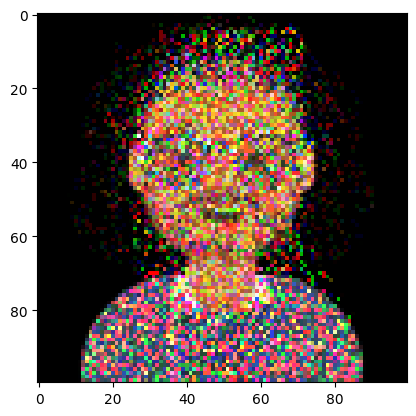

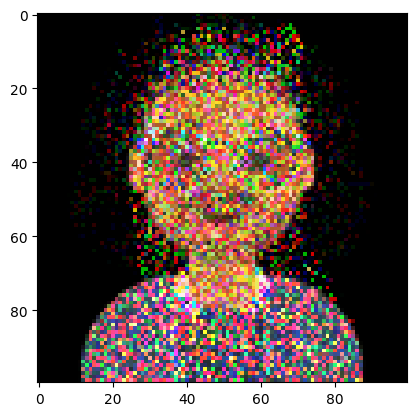

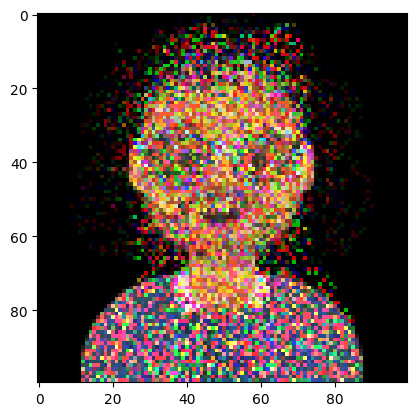

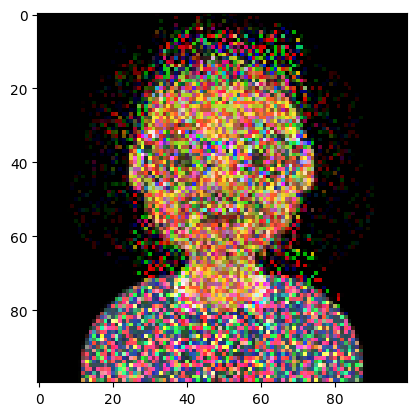

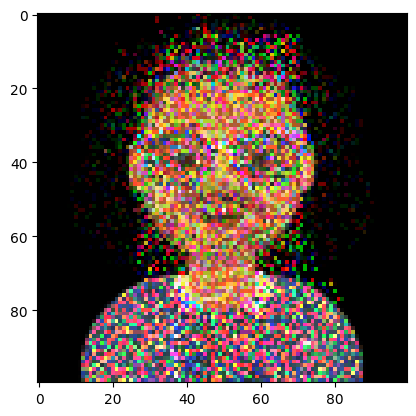

In [13]:
for _ in range(5):
    new_avatar = next(generator)
    plt.figure()
    plt.imshow(new_avatar)
    plt.plot()